In [182]:
import math
import os
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special

In [183]:
list_sep = np.arange(100, 10000, 20)
list_mix = np.arange(1, 24, 1)
innerdim = 2


In [184]:
os.remove("./separable_cputime.txt")
os.remove("./pure_cputime.txt")

In [185]:
for ii in list_sep:
    output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(innerdim, ii, "y"), 
                    stdout=subprocess.PIPE, encoding="utf-8")

for jj in list_mix:
    output = subprocess.run(["./Ex1.out", "-s"], input="{} \n {} \n {}".format(innerdim, jj, "n"), 
                    stdout=subprocess.PIPE, encoding="utf-8")

In [186]:
sep_time = np.genfromtxt("./separable_cputime.txt", delimiter=",", comments="#")
pure_time = np.genfromtxt("./pure_cputime.txt", delimiter=",", comments="#")

In [187]:
def linear(x, a, b):
        return a * x + b

In [188]:
def exp(x, a, b):
    return a * (innerdim * b) **x

In [189]:
def plot_efficiency_sep(list_sep, sep_time):

    popt, pcov = curve_fit(linear, list_sep, sep_time) #, p0 = [1., 0.])
    err = np.sqrt(pcov)
     
    plt.figure(figsize=(10, 5))
    plt.title(f"Efficiency initialization")
    plt.ylabel("Cpu Time [s]")
    plt.xlabel("Number of subsystems, inner dim = 2")

    plt.plot(list_sep, sep_time, 'b', marker='', label = f'separable state init.') #'#002FD0'
    plt.plot(list_sep, linear(list_sep, *popt), 'dodgerblue', label = r"$y = a \ x + b$")
    plt.plot([], [], ' ', label=(f"a = {popt[0]:.2e} \u00B1 {err[0, 0]:.1e}"))
    plt.plot([], [], ' ', label=(f"b = {popt[1]:.2e} \u00B1 {err[1, 1]:.1e}"))

    plt.legend()
    plt.savefig(f'./Plots/efficiencysep_d={innerdim}.png', bbox_inches="tight")
    plt.show()

In [195]:
def plot_efficiency_mix(list_mix, pure_time):

    popt, pcov = curve_fit(exp, list_mix, pure_time)#, p0 = [1., 1., 0.])
    err = np.sqrt(pcov)
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Efficiency initialization")
    plt.ylabel("Cpu Time [s]")
    plt.xlabel("Number of subsystems, inner dim = 2")

    plt.plot(list_mix, exp(list_mix, *popt), 'r', label = r"$y = a \ 2^{(b*x)}$")
    plt.plot(list_mix, pure_time, 'g', marker = '+', linestyle = 'none', label = f'pure state init.') #linestyle = 'dashdot'
    plt.plot([], [], ' ', label=(f"a = {popt[0]:.2e} \u00B1 {err[0, 0]:.1e}"))
    plt.plot([], [], ' ', label=(f"b = {popt[1]:.2e} \u00B1 {err[1, 1]:.1e}"))
    #plt.plot([], [], ' ', label=(f"c = {popt[2]:.2e} \u00B1 {err[2, 2]:.1e}"))
    plt.yscale('log')
    #plt.xlim([0,20])

    plt.legend()
    plt.savefig(f'./Plots/efficiencypure_d={innerdim}.png', bbox_inches="tight")
    plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_506/1659581981.py:4: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(pcov)


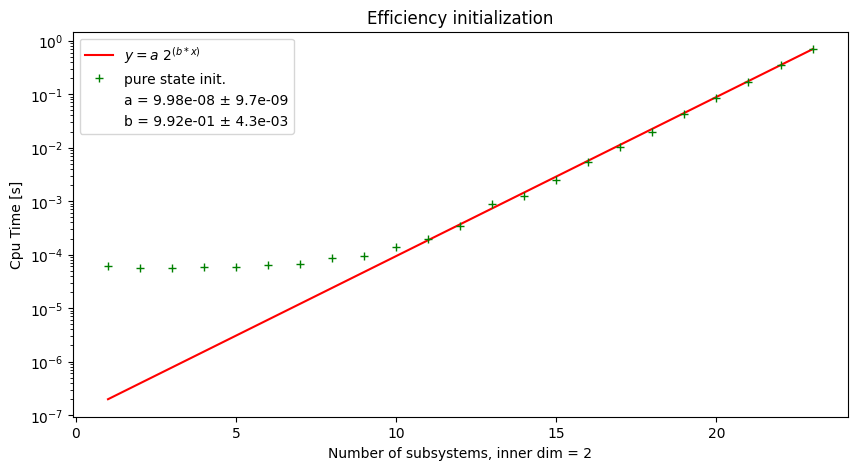

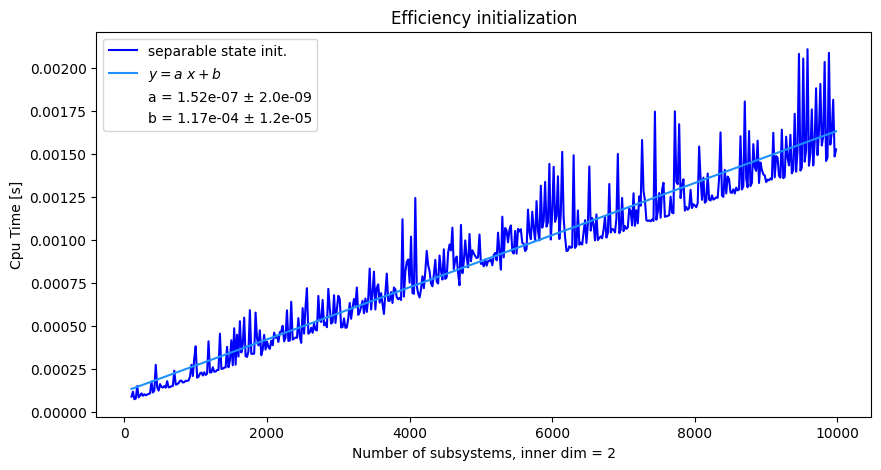

In [196]:
plot_efficiency_mix(list_mix, pure_time)
plot_efficiency_sep(list_sep, sep_time)

In [192]:
def plot_residue_mix(list_mix, pure_time):

    popt, pcov = curve_fit(exp, list_mix, pure_time)#, p0 = [1., 1., 0.])
    err = np.sqrt(pcov)
    zeros = 0 * list_mix
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Residue initialization pure state")
    plt.ylabel("Cpu Time [s]")
    plt.xlabel("Number of subsystems, inner dim = 2")

    plt.plot(list_mix, pure_time - exp(list_mix, *popt), 'dodgerblue', marker = '+', linestyle = 'none',  label = "$residue$")
    plt.plot(list_mix, zeros, 'g') #linestyle = 'dashdot'
    #plt.xlim([10,30])

    plt.legend()
    plt.savefig(f'./Plots/residuepure_d={innerdim}.png', bbox_inches="tight")
    plt.show()

In [193]:
def plot_residue_sep(list_sep, sep_time):

    popt, pcov = curve_fit(linear, list_sep, sep_time)#, p0 = [1., 1., 0.])
    err = np.sqrt(pcov)
    zeros = 0 * list_sep
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Residue initialization Sep. state")
    plt.ylabel("Cpu Time [s]")
    plt.xlabel("Number of subsystems, inner dim = 2")

    plt.plot(list_sep, sep_time - linear(list_sep, *popt), 'dodgerblue', marker = '+', linestyle = 'none',  label = "$residue$")
    plt.plot(list_sep, zeros, 'g') #linestyle = 'dashdot'
    #plt.xlim([10,30])

    plt.legend()
    plt.savefig(f'./Plots/residuesep_d={innerdim}.png', bbox_inches="tight")
    plt.show()

/var/folders/7b/vhzlkjt92hsbp4cqg1zkxv5m0000gn/T/ipykernel_506/3351534356.py:4: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(pcov)


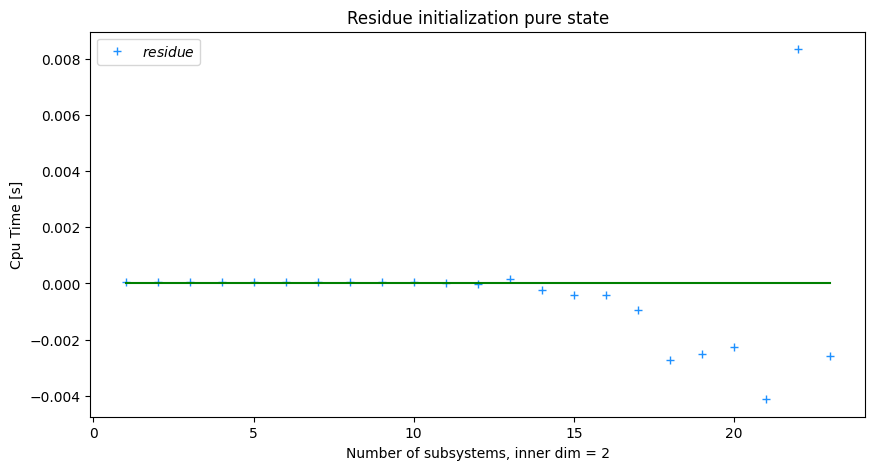

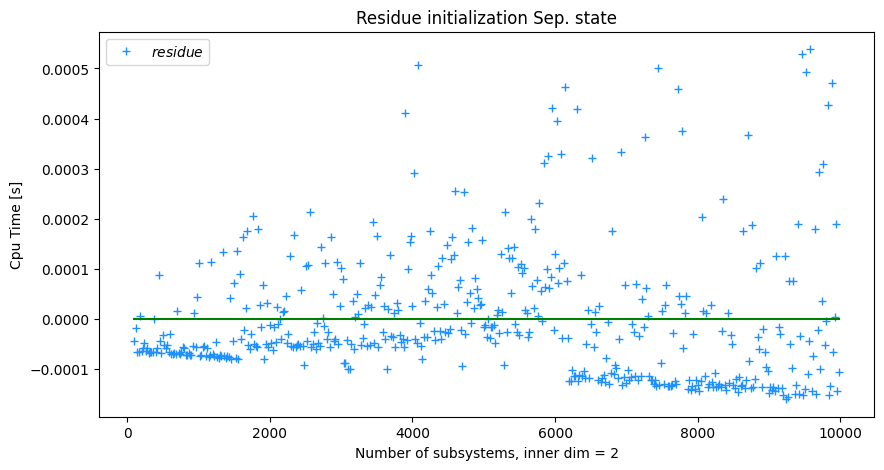

In [194]:
plot_residue_mix(list_mix, pure_time)
plot_residue_sep(list_sep, sep_time)